<div style="float:left">
    <h1 style="width:600px">Assessment</h1>
    <h3 style="width:600px">CASA0002: Urban Simulation</h3>
    <h3 style="width:600px">Author: Andres Restrepo</h3>

</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Required libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Data reading

### Underground network

In [2]:
G = nx.read_graphml('Data/Inputs/london.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

### OD matrix

In [4]:
OD = pd.read_csv('Data/Inputs/OD_matrix.csv',index_col='station_origin')
OD.rename_axis('station_destination', axis=1,inplace=True)

In [5]:
type(OD)

pandas.core.frame.DataFrame

### Flow data

In [6]:
london_OD_AMpeak = pd.read_csv('Data/Inputs/london_flows.csv')

In [7]:
type(london_OD_AMpeak)

pandas.core.frame.DataFrame

## Data inspection

### Underground network

In [8]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_2532/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [9]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': '(533127.7645573226, 181621.32983581326)'})

In [10]:
# #check that all distances are greater or equal to euclidean distance
# for u,v, data in G.edges(data=True):
#     assert(data['length'] >= distance.euclidean(pos[u], pos[v]))

In [11]:
#if want to know what is the maximum distance between stations
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.373927496304, 'line_name': 'Metropolitan', 'flows': 55124})

In [12]:
#if want to know to which stations Baker Street is directly connected to
Baker_Street = [(u,v) for  u,v in G.edges() if u == 'Baker Street' or v == 'Baker Street']
Baker_Street

[('Bond Street', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Edgware Road'),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park"),
 ('Baker Street', "St. John's Wood")]

In [13]:
#if want to know to which stations Baker Street is directly connected to
Stratford = [(u,v) for  u,v in G.edges() if u == 'Stratford' or v == 'Stratford']
Stratford

[('Liverpool Street', 'Stratford'),
 ('Stratford', 'Maryland'),
 ('Stratford', 'Mile End'),
 ('Stratford', 'Leyton'),
 ('Stratford', 'Stratford High Street'),
 ('Stratford', 'Pudding Mill Lane'),
 ('Stratford', 'Stratford International'),
 ('Stratford', 'Hackney Wick'),
 ('Stratford', 'West Ham')]

In [14]:
#We can also check the degree of the nodes in our network and check that they make sense
deg_london = nx.degree(G)

In [15]:
df = pd.DataFrame(index = dict(deg_london).keys())
df['degree'] = dict(deg_london).values()

In [16]:
df.sort_values('degree', ascending =False).head(20)

,degree
Stratford,9
Bank and Monument,8
Baker Street,7
King's Cross St. Pancras,7
Liverpool Street,6
Green Park,6
Waterloo,6
West Ham,6
Oxford Circus,6
Canning Town,6


The inspecting results are consistent with the results of Practical 10.

### OD matrix

In [17]:
OD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, Abbey Road to All
Columns: 400 entries, Abbey Road to All
dtypes: int64(400)
memory usage: 1.2+ MB


In [18]:
OD.head()

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,32,599
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224
Acton Town,0,0,0,3,17,0,35,0,0,11,...,77,3,6,9,0,0,0,0,0,3745
Aldgate,0,0,0,0,0,0,0,0,0,17,...,0,0,4,8,0,0,0,0,0,2886
Aldgate East,0,0,2,0,0,0,0,0,0,20,...,24,0,0,12,0,1,0,1,0,3172


The inspecting results are consistent with the results of Practical 10.

### Flow data

In [19]:
london_OD_AMpeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [20]:
london_OD_AMpeak.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


The inspecting results are consistent with the results of Practical 10.

## London’s underground resilience

![img](https://tfl.gov.uk/cdn/static/cms/images/london-rail-and-tube-services-map.gif)

In [21]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [22]:
list(G.nodes(data = True))[0]

('Liverpool Street', {'coords': (533127.7645573226, 181621.32983581326)})

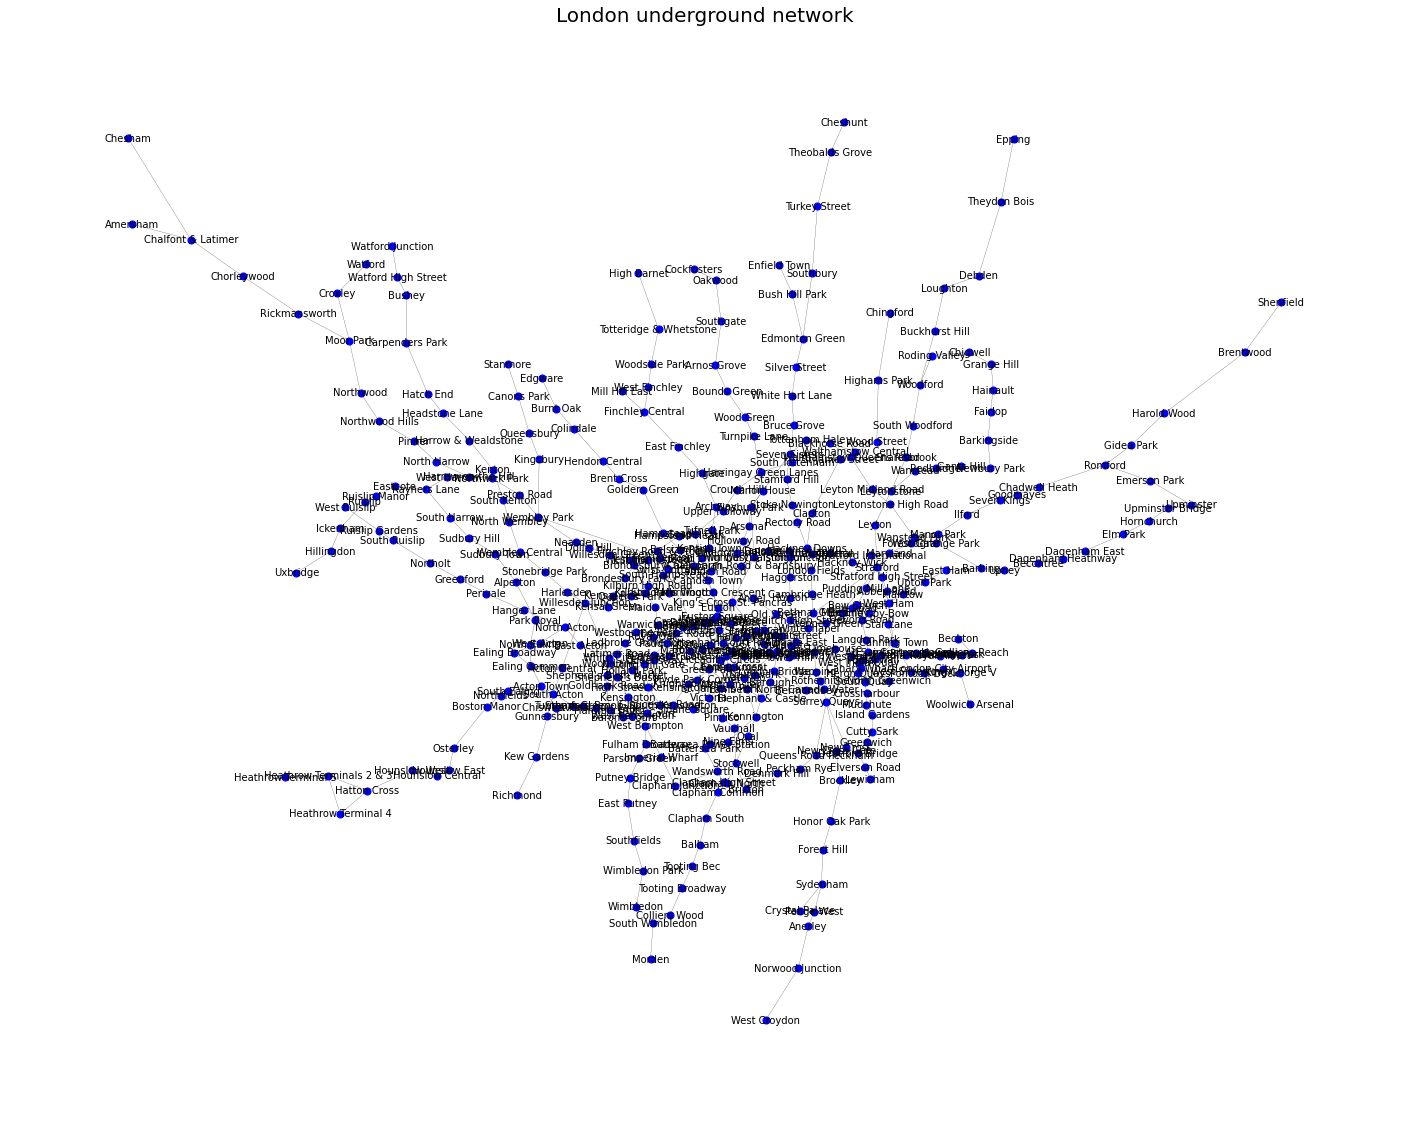

In [23]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

pos = nx.get_node_attributes(G, 'coords')

# Nodes
nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
# Edges
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
# Labels
nx.draw_networkx_labels(G,pos, font_size=10, font_color='black')

plt.title("London underground network",fontsize=20)
plt.axis("off")
plt.show()

**It better to normalized to compare more easily?**

### Centrality measures

**Include eigen vector centrality?**

#### Calculation

In [24]:
df_centrality = pd.DataFrame(index=G.nodes())

deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
df_centrality['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

clos_london = nx.closeness_centrality(G)
nx.set_node_attributes(G,clos_london,'closeness_t')
df_centrality['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness_t')
df_centrality['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

eig_london = nx.eigenvector_centrality_numpy(G)
nx.set_node_attributes(G,bet_london,'eigenvector_t')
df_centrality['eigenvector_t'] = pd.Series(nx.get_node_attributes(G, 'eigenvector_t'))
# Change the tolerance value



In [25]:
df_centrality.head(10).sort_values(by=['degree'],ascending=False)

,degree,closeness_t,betweenness_t,eigenvector_t
Stratford,0.0225,0.104384,0.297846,0.297846
Liverpool Street,0.0150,0.110254,0.270807,0.270807
Romford,0.0075,0.059058,0.032774,0.032774
Maryland,0.0050,0.095193,0.063973,0.063973
Forest Gate,0.0050,0.087489,0.059337,0.059337
Manor Park,0.0050,0.080939,0.054700,0.054700
Ilford,0.0050,0.075301,0.050064,0.050064
Seven Kings,0.0050,0.070398,0.045427,0.045427
Goodmayes,0.0050,0.066094,0.040791,0.040791
Chadwell Heath,0.0050,0.062334,0.036217,0.036217


#### Degree centrality

In [26]:
df_centrality['degree'].sort_values(ascending=False)

Stratford                   0.0225
Bank and Monument           0.0200
Baker Street                0.0175
King's Cross St. Pancras    0.0175
Liverpool Street            0.0150
                             ...  
Watford Junction            0.0025
Cockfosters                 0.0025
Stratford International     0.0025
Wimbledon                   0.0025
Stanmore                    0.0025
Name: degree, Length: 401, dtype: float64

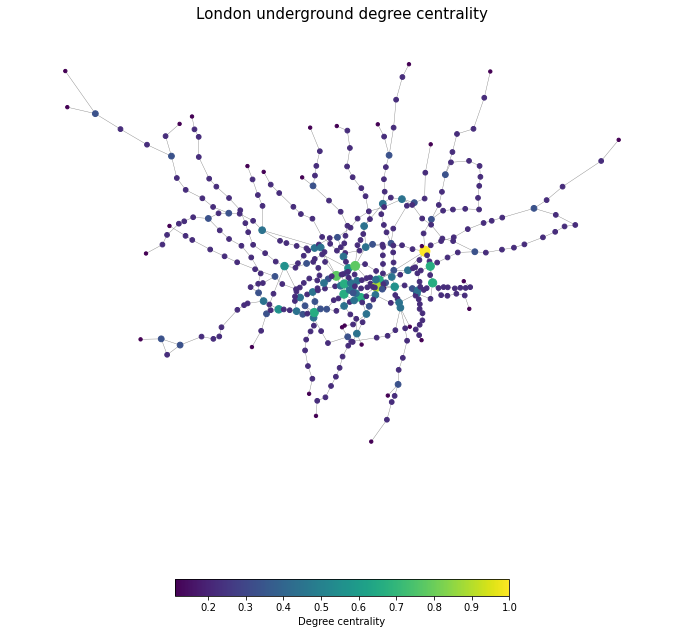

In [27]:
# Plot of degree centrality
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree
deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
# Sclaling using the maximum value of the degree and multipling it by 50
deg_size=[(i[1]['degree']/(max(degree_values)))*100 for i in G.nodes(data=True)]


# Plot graph
pos=pos
fig, ax = plt.subplots(figsize=(12,12))
# Edges
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
# Nodes
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Closeness centrality

In [28]:
df_centrality['closeness_t'].sort_values(ascending=False)[0:10]

Green Park                  0.114778
Bank and Monument           0.113572
King's Cross St. Pancras    0.113443
Westminster                 0.112549
Waterloo                    0.112265
Oxford Circus               0.111204
Bond Street                 0.110988
Farringdon                  0.110742
Angel                       0.110742
Moorgate                    0.110314
Name: closeness_t, dtype: float64

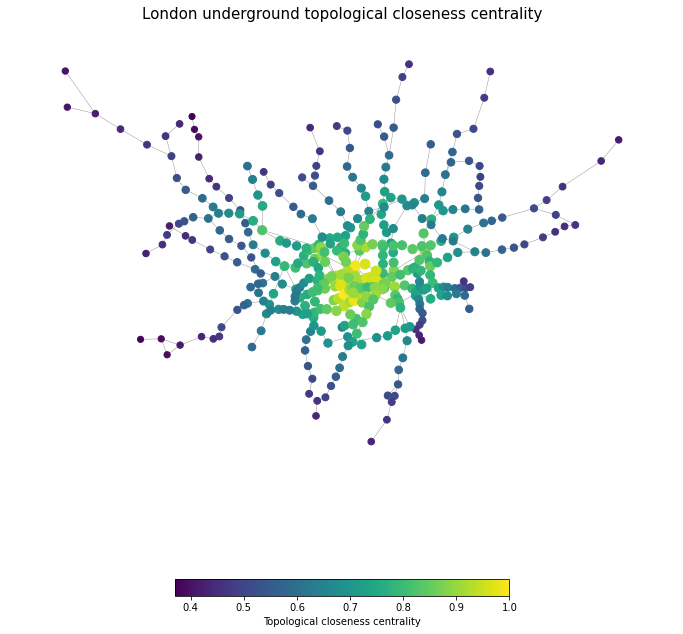

In [29]:
# Lets set color and width of nodes according to the closeness values
close_t_values=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

# close_t_color=[(i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values)) for i in G.nodes(data=True)]
# close_t_size=[((i[1]['closeness_t']-min(close_t_values))/(max(close_t_values)-min(close_t_values))*50) for i in G.nodes(data=True)]

close_t_color=[(i[1]['closeness_t']/max(close_t_values)) for i in G.nodes(data=True)]
close_t_size=[(i[1]['closeness_t']/max(close_t_values)*100) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= close_t_color,
        node_size= close_t_size)

plt.colorbar(nod,label="Topological closeness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological closeness centrality",fontsize=15)
plt.show()

#### Betweenness centrality

In [30]:
df_centrality['betweenness_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: betweenness_t, dtype: float64

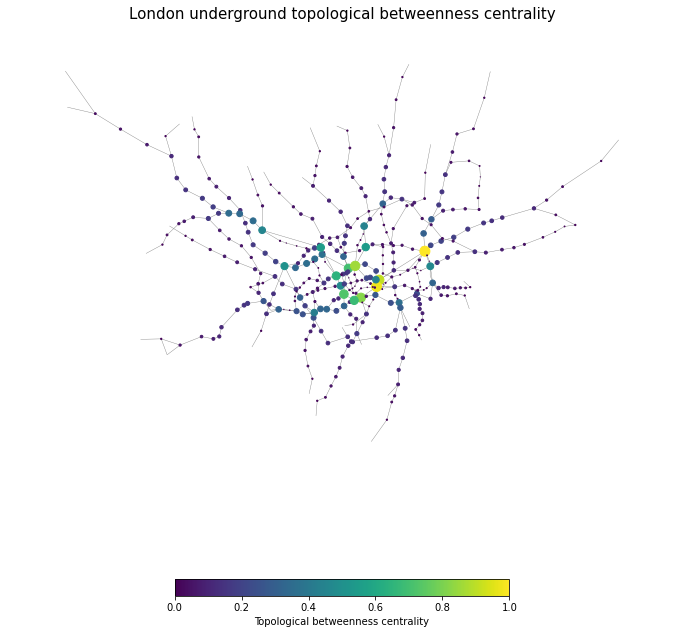

In [31]:
# Lets set colour and size of nodes according to betweenness values
bet_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(bet_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(bet_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Topological betweenness centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological betweenness centrality",fontsize=15)
plt.show()

#### Eigenvector  centrality

In [32]:
df_centrality['eigenvector_t'].sort_values(ascending=False)[0:10]

Stratford                   0.297846
Bank and Monument           0.290489
Liverpool Street            0.270807
King's Cross St. Pancras    0.255307
Waterloo                    0.243921
Green Park                  0.215835
Euston                      0.208324
Westminster                 0.203335
Baker Street                0.191568
Finchley Road               0.165085
Name: eigenvector_t, dtype: float64

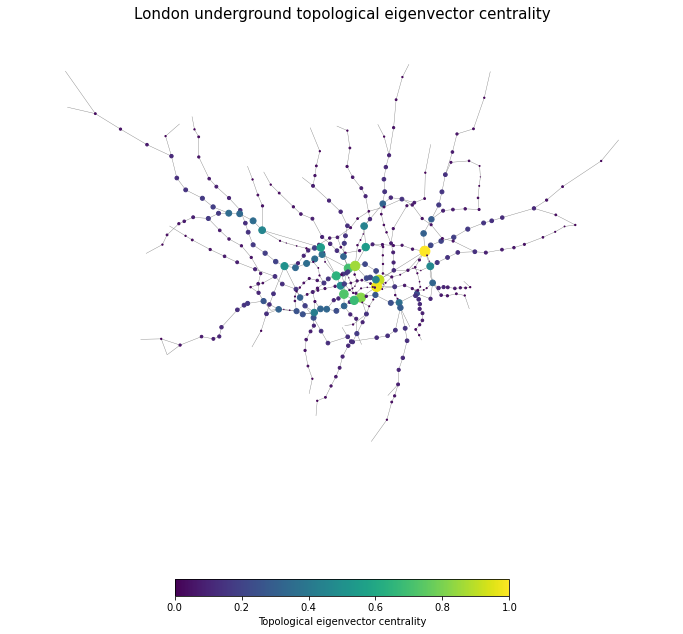

In [33]:
# Eigenvetor centrality
eig_t_values=[(i[1]['eigenvector_t']) for i in G.nodes(data=True)]
eig_t_color=[(i[1]['eigenvector_t']/max(eig_t_values)) for i in G.nodes(data=True)]
eig_t_size=[(i[1]['eigenvector_t']/max(eig_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= eig_t_color, node_size= eig_t_size)

plt.colorbar(nod,label="Topological eigenvector centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground topological eigenvector centrality",fontsize=15)
plt.show()

#### Results summary

In [34]:
df_ranking = pd.DataFrame()
rank = list(range(1, df_centrality.shape[0]+1))
df_ranking['rank'] = rank

degree_rank = df_centrality.sort_values(by='degree',ascending=False).index.values.tolist()
degree_value = df_centrality['degree'].sort_values(ascending=False).values.tolist()
clos_rank = df_centrality.sort_values(by='closeness_t',ascending=False).index.values.tolist()
clos_value = df_centrality['closeness_t'].sort_values(ascending=False).values.tolist()
bet_rank = df_centrality.sort_values(by='betweenness_t',ascending=False).index.values.tolist()
bet_value = df_centrality['betweenness_t'].sort_values(ascending=False).values.tolist()
eig_rank = df_centrality.sort_values(by='eigenvector_t',ascending=False).index.values.tolist()
eig_value = df_centrality['eigenvector_t'].sort_values(ascending=False).values.tolist()


df_ranking['Degree'] = degree_rank
df_ranking['Degree value'] = degree_value
df_ranking['Topological closeness'] = clos_rank
df_ranking['Closeness value'] = clos_value
df_ranking['Topological betweenness'] = bet_rank
df_ranking['Betweenness value'] = bet_value
df_ranking['Topological Eigenvector'] = eig_rank
df_ranking['Eigenvector value'] = eig_value

df_ranking.head(10)


,rank,Degree,Degree value,Topological closeness,Closeness value,Topological betweenness,Betweenness value,Topological Eigenvector,Eigenvector value
0,1,Stratford,0.0225,Green Park,0.114778,Stratford,0.297846,Stratford,0.297846
1,2,Bank and Monument,0.0200,Bank and Monument,0.113572,Bank and Monument,0.290489,Bank and Monument,0.290489
2,3,Baker Street,0.0175,King's Cross St. Pancras,0.113443,Liverpool Street,0.270807,Liverpool Street,0.270807
3,4,King's Cross St. Pancras,0.0175,Westminster,0.112549,King's Cross St. Pancras,0.255307,King's Cross St. Pancras,0.255307
4,5,Liverpool Street,0.0150,Waterloo,0.112265,Waterloo,0.243921,Waterloo,0.243921
5,6,Green Park,0.0150,Oxford Circus,0.111204,Green Park,0.215835,Green Park,0.215835
6,7,Waterloo,0.0150,Bond Street,0.110988,Euston,0.208324,Euston,0.208324
7,8,West Ham,0.0150,Farringdon,0.110742,Westminster,0.203335,Westminster,0.203335
8,9,Oxford Circus,0.0150,Angel,0.110742,Baker Street,0.191568,Baker Street,0.191568
9,10,Canning Town,0.0150,Moorgate,0.110314,Finchley Road,0.165085,Finchley Road,0.165085


In [35]:
# df_ranking.loc[]

### Impact measures

**Nodes**

In [36]:
#list(G.nodes())

**Number of nodes**

In [37]:
G.number_of_nodes()

401

**Diameter**

In [38]:
d=nx.diameter(G)
print(d)

36


**Average shortest path**

In [39]:
asp = nx.average_shortest_path_length(G)
print(asp)

13.545997506234414


**Number of connected components**

In [40]:
nx.number_connected_components(G)

1

**Size of the largest component**

In [41]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G.subgraph(largest_component)

In [42]:
Largest_subgraph.number_of_nodes()

401

In [43]:
type(components)

generator

In [44]:
# You can compute the diameter of the largest component
d_lc = nx.diameter(Largest_subgraph)
d_lc

36

**Size of multiple components**

In [45]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G)]
[len(subgraph.nodes) for subgraph in Subg]

[401]

In [46]:
list([len(subgraph.nodes) for subgraph in Subg])

[401]

In [47]:
type([len(subgraph.nodes) for subgraph in Subg])

list

#### Calculation

**Single df storage with label**

**For loop to iterate in the impact results df**

In [48]:
G_copy = G.copy()

# G_d = G.copy()
# G_c = G.copy()
# G_b = G.copy()
# G_e = G.copy()

In [49]:
nx.number_connected_components(G_copy)

1

In [50]:
degree_rank[0]

'Stratford'

In [51]:
#degree_rank

In [52]:
# Create a blank df
non_sq = pd.DataFrame()
#Create empy columns
non_sq['Nodes'] = np.nan
non_sq['Removed nodes'] = np.nan
non_sq['Diameter for largest component'] = np.nan
non_sq['Average shortest path'] = np.nan


**Loop that changes copy of network and labels in reuslts df**

In [53]:
ranks = [degree_rank, clos_rank, bet_rank ,eig_rank]

In [54]:
# ranks = ['degree_rank']

In [55]:
labels = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']

In [56]:
# # Working code
# for station in degree_rank[0:11]:
#     # Remove a node from the graph
#     G_d.remove_node(station)
    
#     # Check if the graph is connected
#     if nx.is_connected(G_d):
#         # Calculate the number of nodes in the graph
#         nodes = nx.number_of_nodes(G_d)
#         re_nodes = G_copy.number_of_nodes() - G_d.number_of_nodes()
#         diameter = nx.diameter(G_d)
#         avr_shortest = nx.average_shortest_path_length(G_d)

#         # Add the station, number of nodes, and diameter to the DataFrame
#         # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
#         non_sq = pd.concat([non_sq, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter for largest component': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':'Degree'})], ignore_index=True)
#     else:
#         # Find the largest connected component
#         lar_component = max(nx.connected_components(G_d), key=len)

#         # Create a subgraph of the largest connected component
#         Largest_subgraph = G_d.subgraph(lar_component)

#         # Calculate the number of nodes in the subgraph
#         nodes = nx.number_of_nodes(G_d)
        
#         re_nodes = G_copy.number_of_nodes() - G_d.number_of_nodes()
        
#         # Calculate the diameter of the subgraph
#         diameter = nx.diameter(Largest_subgraph)
        
#         avr_shortest = nx.average_shortest_path_length(Largest_subgraph)

#         # Add the station, number of nodes, and diameter to the DataFrame
#         non_sq = pd.concat([non_sq, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter for largest component': [diameter],'Average shortest path':[avr_shortest],'Centrality measure':'Degree'})], ignore_index=True)


In [57]:
# Error in the first measurement

for r in ranks:
    #print(r)
    G_i = G_copy.copy()

    for station in r[0:11]: 
        # Remove a node from the graph
        
        #print(station) # ERROR
        #G_i.remove_node(station) # Erasing before the first impact measurement is performed

        # Check if the graph is connected
        if nx.is_connected(G_i):
            # Calculate the number of nodes in the graph
            nodes = nx.number_of_nodes(G_i)
            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()
            diameter = nx.diameter(G_i)
            avr_shortest = nx.average_shortest_path_length(G_i)

            # Add the station, number of nodes, and diameter to the DataFrame
            # non_sq = non_sq.append({'Nodes': nodes, 'Removed nodes': re_nodes, 'Diameter for largest component': diameter,'Average shortest path':avr_shortest}, ignore_index=True)
            non_sq = pd.concat([non_sq, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter for largest component': [diameter],'Average shortest path':[avr_shortest], 'Centrality measure':labels[ranks.index(r)]})], ignore_index=True)
            G_i.remove_node(station)
        else:
            # Find the largest connected component
            lar_component = max(nx.connected_components(G_i), key=len)

            # Create a subgraph of the largest connected component
            Largest_subgraph = G_i.subgraph(lar_component)

            # Calculate the number of nodes in the subgraph
            nodes = nx.number_of_nodes(G_i)

            re_nodes = G_copy.number_of_nodes() - G_i.number_of_nodes()

            # Calculate the diameter of the subgraph
            diameter = nx.diameter(Largest_subgraph)

            avr_shortest = nx.average_shortest_path_length(Largest_subgraph)

            # Add the station, number of nodes, and diameter to the DataFrame
            non_sq = pd.concat([non_sq, pd.DataFrame({'Nodes': [nodes], 'Removed nodes': [re_nodes], 'Diameter for largest component': [diameter],'Average shortest path':[avr_shortest],'Centrality measure':labels[ranks.index(r)]})], ignore_index=True)
            G_i.remove_node(station)


In [58]:
non_sq

,Nodes,Removed nodes,Diameter for largest component,Average shortest path,Centrality measure
0,401.0,0.0,36.0,13.545998,Degree
1,400.0,1.0,49.0,14.496447,Degree
2,399.0,2.0,49.0,14.872497,Degree
3,398.0,3.0,49.0,15.686438,Degree
4,397.0,4.0,49.0,17.013376,Degree
5,396.0,5.0,49.0,17.014512,Degree
6,395.0,6.0,49.0,17.176635,Degree
7,394.0,7.0,51.0,17.843372,Degree
8,393.0,8.0,53.0,18.545211,Degree
9,392.0,9.0,53.0,18.617544,Degree


### Node removal

## Spatial interaction models

### Models and calibration

#### Introduction

#### Parameter calibration

### Scenarios

#### Scenario A

#### Scenario B

#### Scenarios discussion